In [39]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from pylab import rcParams

In [3]:
data = pd.read_csv('한국가스공사_시간별 공급량_20181231.csv', encoding = 'euc-kr').dropna()

In [4]:
data.head()

,연월일,시간,구분,공급량
0,2013-01-01,1,A,2497.129
1,2013-01-01,2,A,2363.265
2,2013-01-01,3,A,2258.505
3,2013-01-01,4,A,2243.969
4,2013-01-01,5,A,2344.105


In [5]:
data['연월일'] = pd.to_datetime(data['연월일'])

In [6]:
data.shape

(368088, 4)

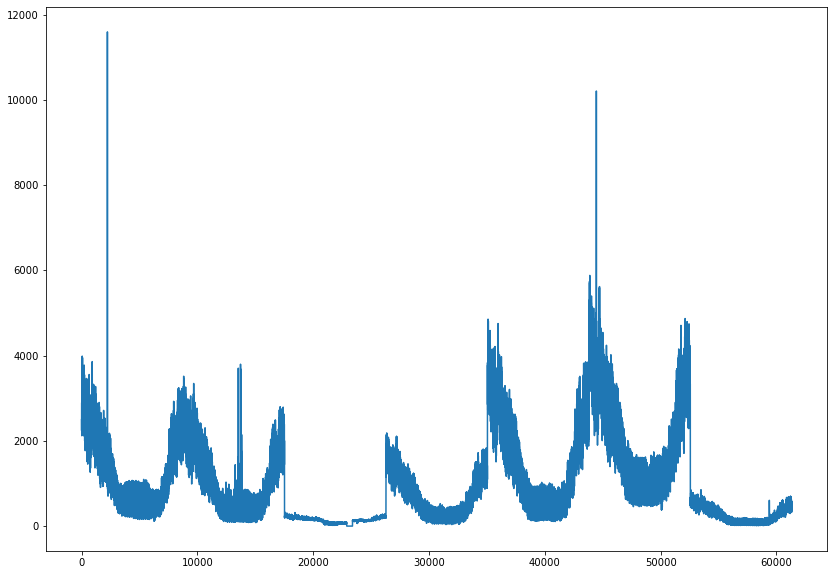

In [7]:
plt.figure(figsize = (14,10))
plt.plot(data['공급량'].iloc[:61320])

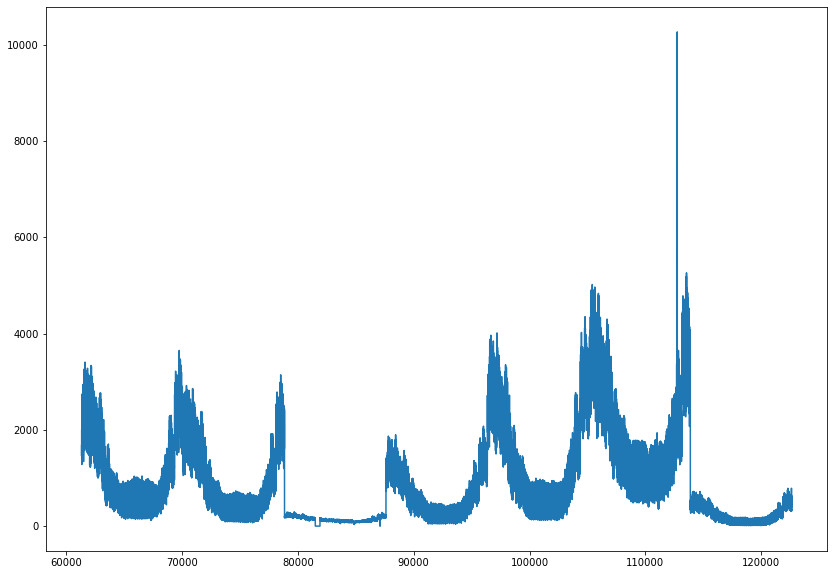

In [8]:
plt.figure(figsize = (14,10))
plt.plot(data['공급량'].iloc[61320*1:61320*2])

In [9]:
data['year'] = data['연월일'].dt.year

In [10]:
data['year'].value_counts()

2016    61488
2013    61320
2014    61320
2015    61320
2017    61320
2018    61320
Name: year, dtype: int64

In [11]:
data['구분'].value_counts()

A    52584
B    52584
C    52584
D    52584
E    52584
G    52584
H    52584
Name: 구분, dtype: int64

In [82]:
suppliers = ['A', 'B', 'C', 'D', 'E', 'G', 'H']
datas = []

for supplier in suppliers:
    datas.append(data[data['구분'] == supplier])

"""
data_A = data[data['구분'] == 'A']
data_B = data[data['구분'] == 'B']
data_C = data[data['구분'] == 'C']
data_D = data[data['구분'] == 'D']
data_E = data[data['구분'] == 'E']
data_G = data[data['구분'] == 'G']
data_H = data[data['구분'] == 'H']

datas = [data_A, data_B, data_C, data_D, data_E, data_G, data_H]
"""


In [13]:
data_A.shape

(52584, 5)

In [86]:
for data in datas:
    data['year'] = data['연월일'].dt.year

In [87]:
months = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]

total = 0
for i in months:
    total += i
    
total

365

In [88]:
index = 0
vertical_coords = []

for i in months:
    index += i
    vertical_coords.append(index)
    
vertical_coords

[31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334, 365]

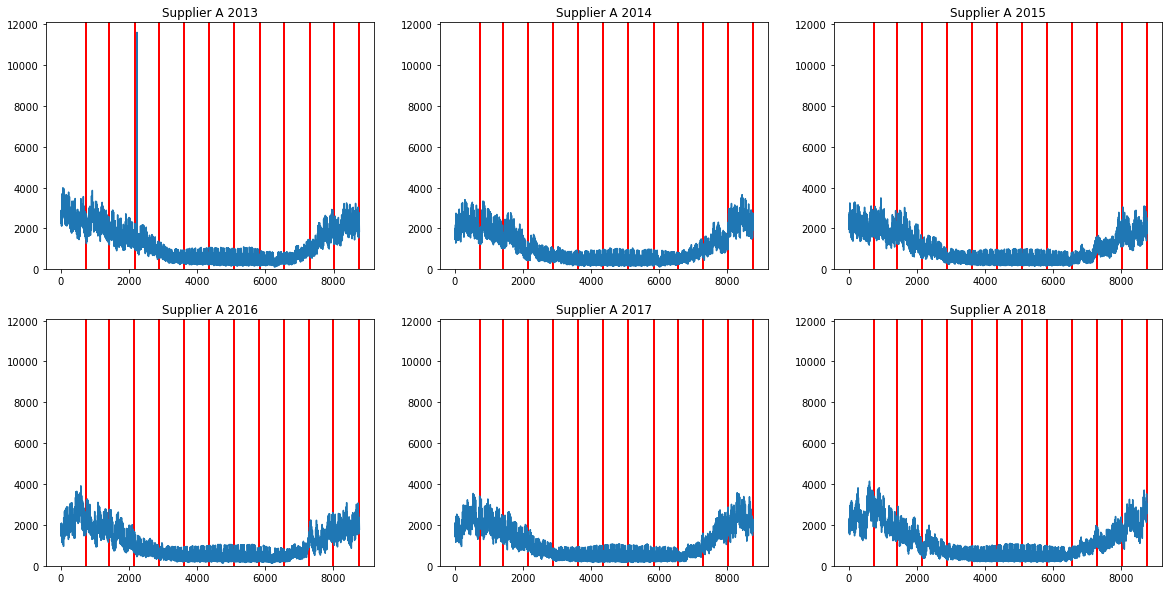

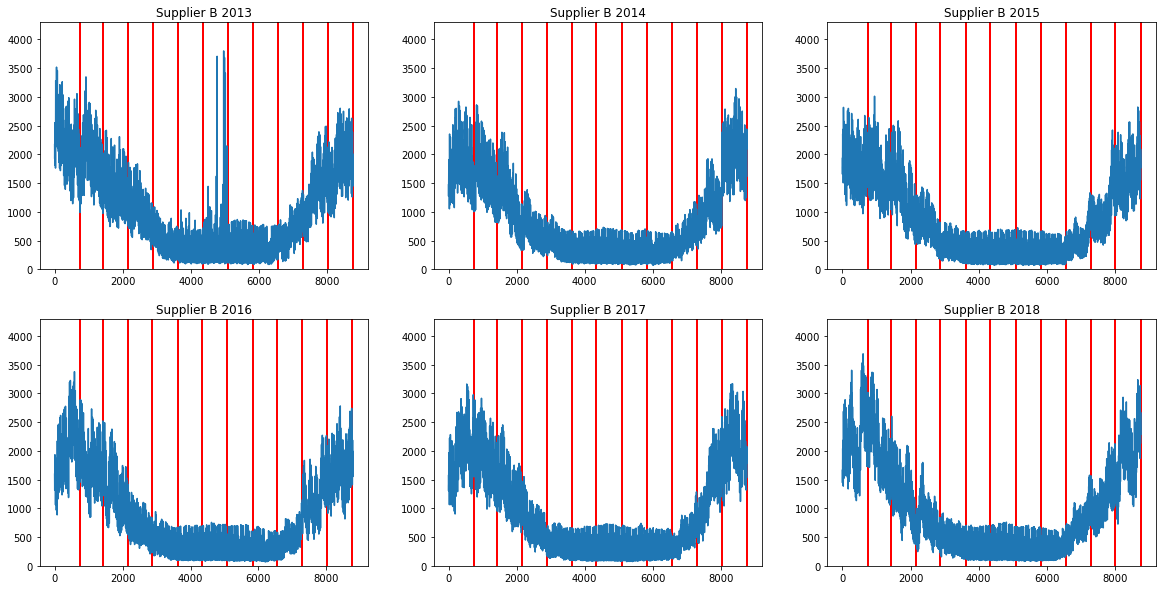

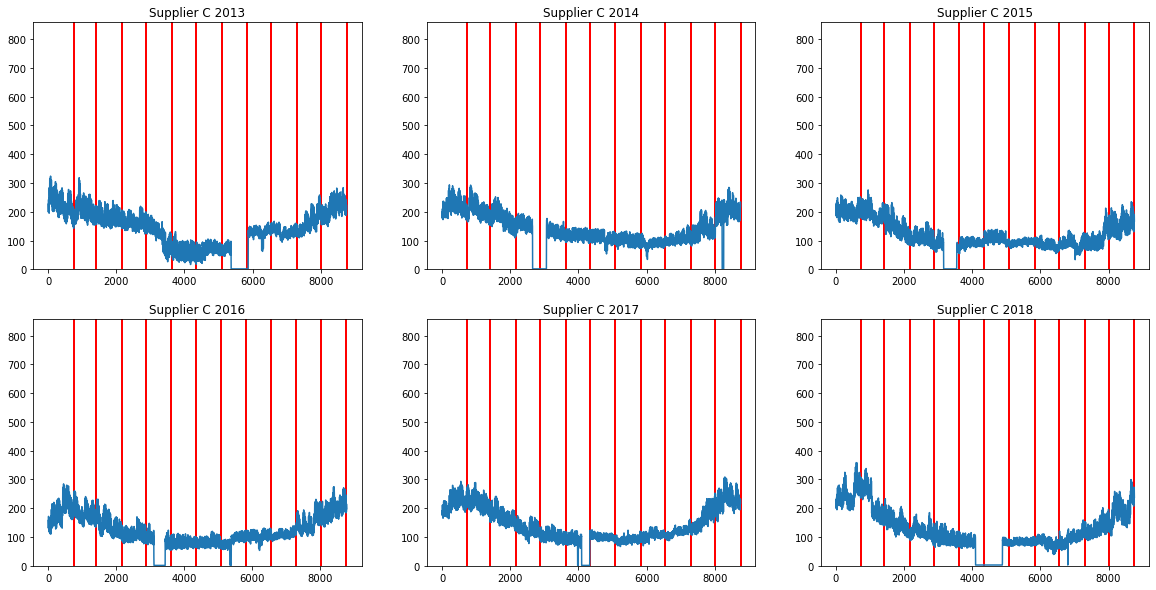

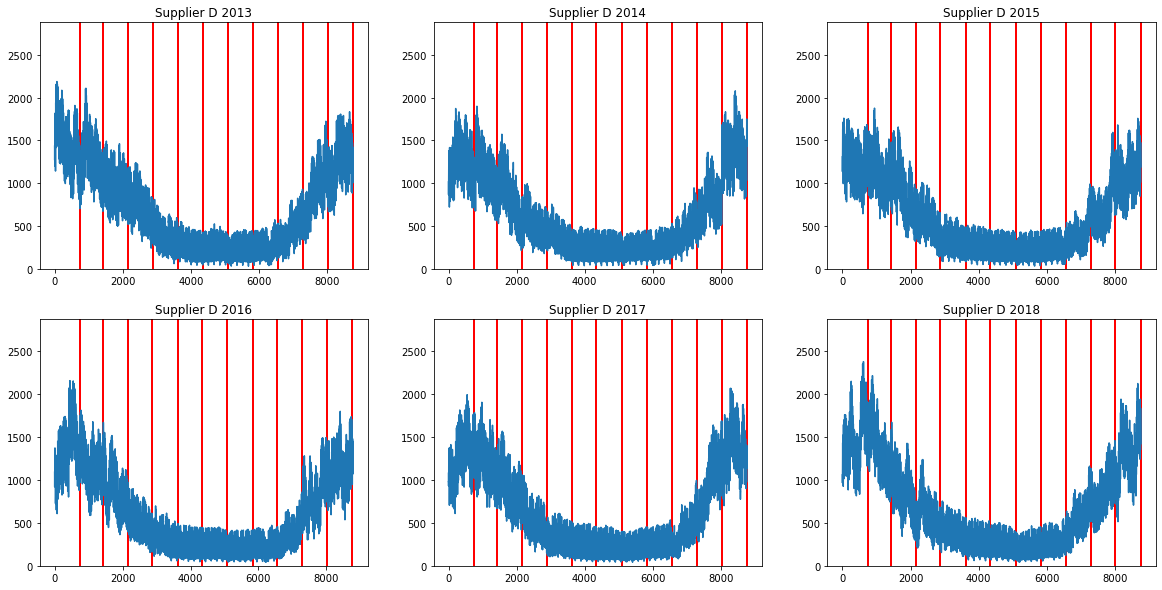

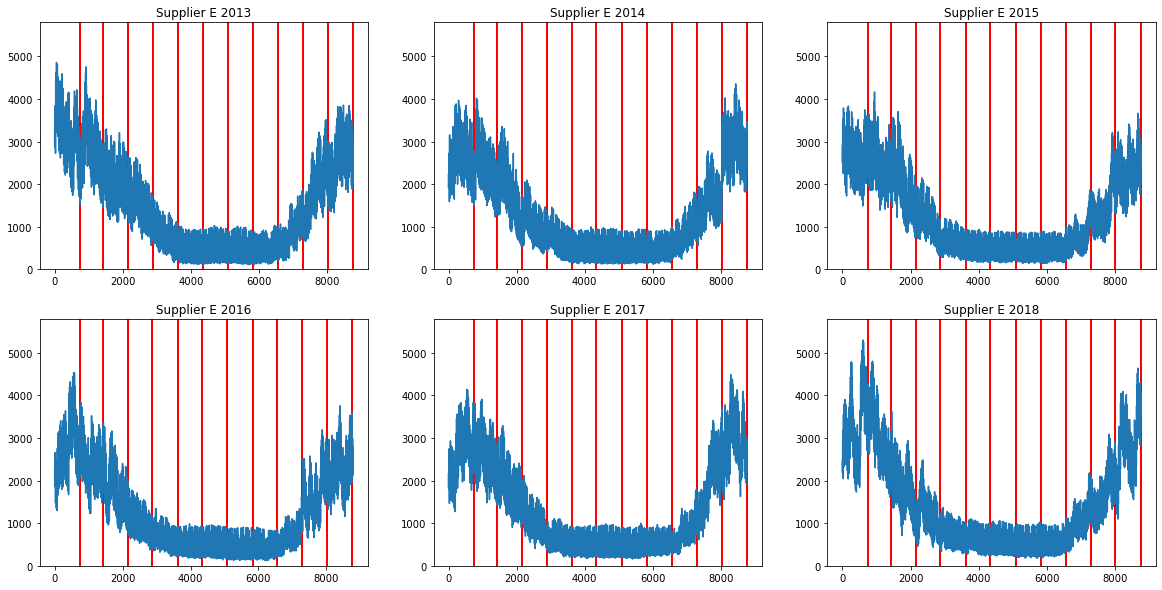

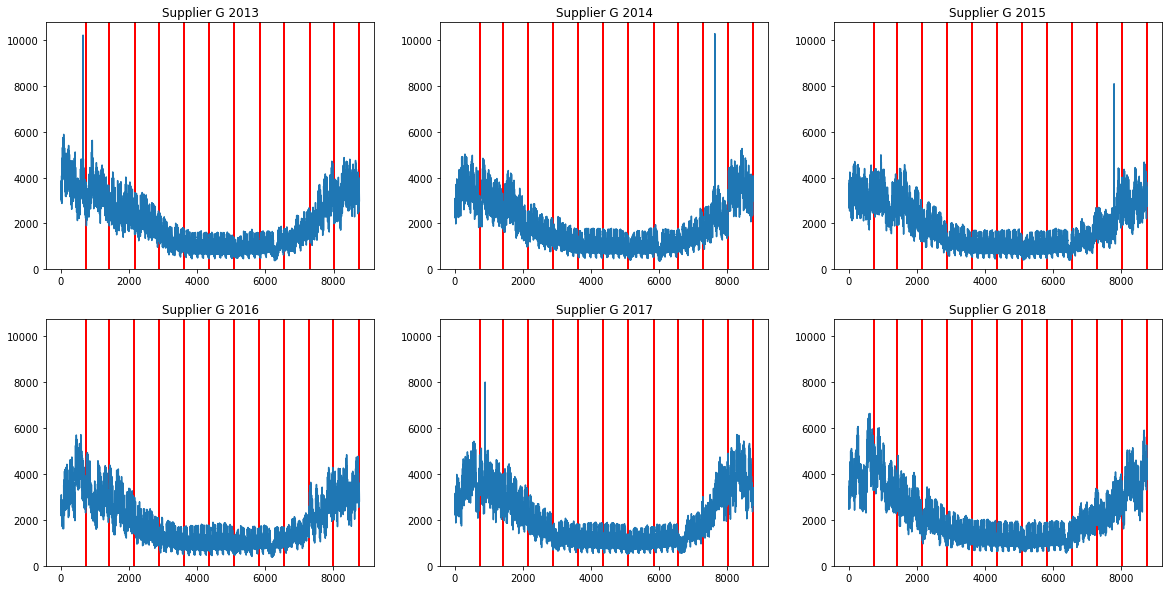

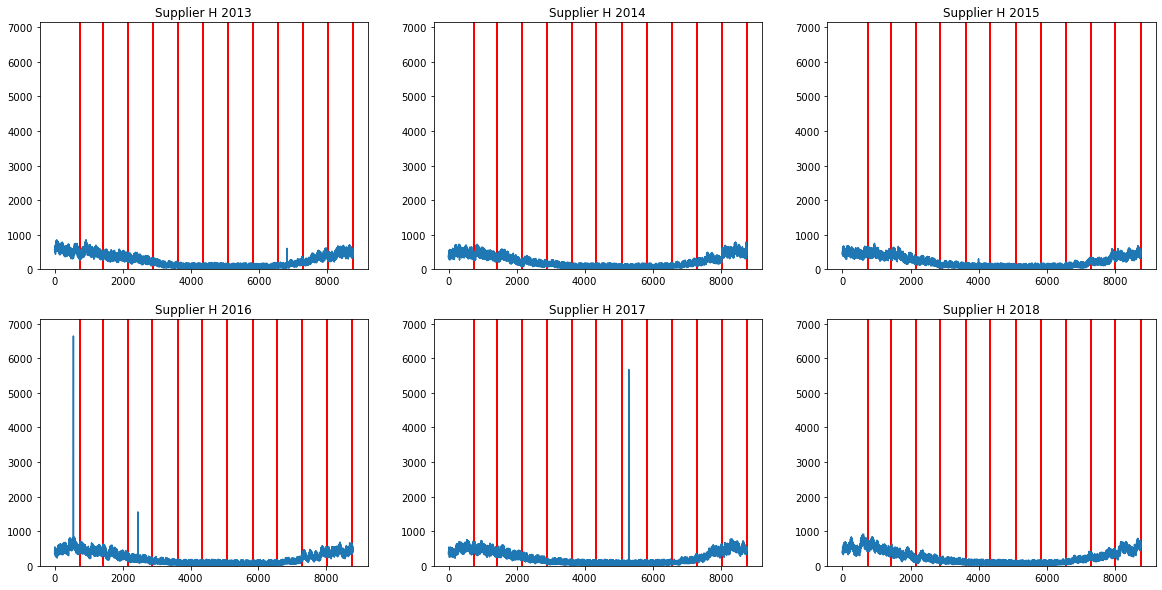

In [90]:
#plt.figure(figsize = (10,6))

for data in datas:
    rcParams['figure.figsize'] = 20, 10
    fig = plt.figure()

    ax1 = fig.add_subplot(231)
    ax2 = fig.add_subplot(232)
    ax3 = fig.add_subplot(233)
    ax4 = fig.add_subplot(234)
    ax5 = fig.add_subplot(235)
    ax6 = fig.add_subplot(236)

    axes = [ax1, ax2, ax3, ax4, ax5, ax6]

    for ax in axes:
        for vc in vertical_coords:
            ax.axvline(vc*24, linewidth=2, color="r")
    
    plotted_datas = []
    years = [2013, 2014, 2015, 2016, 2017, 2018]
    
    for year in years:
        plotted_datas.append(data[data['year'] == year].reset_index())
    
    
    i = 0
    while i < len(axes):
        axes[i].plot(plotted_datas[i]['공급량'])
        axes[i].set_ylim(( 0, data['공급량'].max() + 500 ))
        axes[i].set_title("Supplier "+ str(plotted_datas[i]['구분'][0])+ " " + str(plotted_datas[i]['year'][0]))
        i += 1

    plt.savefig('supplier{}.png'.format(str(plotted_datas[0]['구분'][0])), dpi=100)
